# IDENTITAS
Anggota Kelompok:
1. Farhan Ainurrahman - 225150700111022
2. Dzikri Muhammad Raihan - 225150700111017
3. Mochammad Rasya Dimas Chamdani - 225150707111039
4.  Nova Indrawan - 225150707111043


# Pertanyaan Analisis

1. Berapa rata-rata jumlah kredit (credit amount) yang diminta oleh peminjam dengan risiko kredit "good" dan "bad"?
2. Bagaimana hubungan antara riwayat kredit (credit history) dan status risiko kredit (class)?
3. Apakah terdapat perbedaan signifikan dalam durasi pinjaman (duration) antara peminjam dengan risiko kredit "good" dan "bad"?

# Data Understanding

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import urllib.request

In [ ]:

url = 'https://raw.githubusercontent.com/frhannn1/labsc/main/dataset_31_credit-g.arff'

# Download the file to a local path
local_file, _ = urllib.request.urlretrieve(url)

# Load the ARFF file
data, meta = arff.loadarff(local_file)
# buat kedalam bentuk DataFrame
df = pd.DataFrame(data)

# Dekode byte strings
for col in df.columns:
    if df[col].dtype == object:
        # Hanya mendekode jika tipe datanya adalah bytes
        df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.00,critical/other existing credit,radio/tv,1169.00,no known savings,>=7,4.00,male single,none,...,real estate,67.00,none,own,2.00,skilled,1.00,yes,yes,good
1,0<=X<200,48.00,existing paid,radio/tv,5951.00,<100,1<=X<4,2.00,female div/dep/mar,none,...,real estate,22.00,none,own,1.00,skilled,1.00,none,yes,bad
2,no checking,12.00,critical/other existing credit,education,2096.00,<100,4<=X<7,2.00,male single,none,...,real estate,49.00,none,own,1.00,unskilled resident,2.00,none,yes,good
3,<0,42.00,existing paid,furniture/equipment,7882.00,<100,4<=X<7,2.00,male single,guarantor,...,life insurance,45.00,none,for free,1.00,skilled,2.00,none,yes,good
4,<0,24.00,delayed previously,new car,4870.00,<100,1<=X<4,3.00,male single,none,...,no known property,53.00,none,for free,2.00,skilled,2.00,none,yes,bad
5,no checking,36.00,existing paid,education,9055.00,no known savings,1<=X<4,2.00,male single,none,...,no known property,35.00,none,for free,1.00,unskilled resident,2.00,yes,yes,good
6,no checking,24.00,existing paid,furniture/equipment,2835.00,500<=X<1000,>=7,3.00,male single,none,...,life insurance,53.00,none,own,1.00,skilled,1.00,none,yes,good
7,0<=X<200,36.00,existing paid,used car,6948.00,<100,1<=X<4,2.00,male single,none,...,car,35.00,none,rent,1.00,high qualif/self emp/mgmt,1.00,yes,yes,good
8,no checking,12.00,existing paid,radio/tv,3059.00,>=1000,4<=X<7,2.00,male div/sep,none,...,real estate,61.00,none,own,1.00,unskilled resident,1.00,none,yes,good
9,0<=X<200,30.00,critical/other existing credit,new car,5234.00,<100,unemployed,4.00,male mar/wid,none,...,car,28.00,none,own,2.00,high qualif/self emp/mgmt,1.00,none,yes,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
df.isna().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [ ]:
df.nunique()

,0
checking_status,4
duration,33
credit_history,5
purpose,10
credit_amount,921
savings_status,5
employment,5
installment_commitment,4
personal_status,4
other_parties,3


In [ ]:
df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [ ]:
df.duplicated().sum()

0

# Explorasi Data Analys (EDA)

## Berapa jumlah kredit (credit amount) yang diminta oleh peminjam dengan risiko kredit "good" dan "bad"?

In [ ]:
df['credit_amount'].describe()

,credit_amount
count,1000.00
mean,3271.26
std,2822.74
min,250.00
25%,1365.50
50%,2319.50
75%,3972.25
max,18424.00


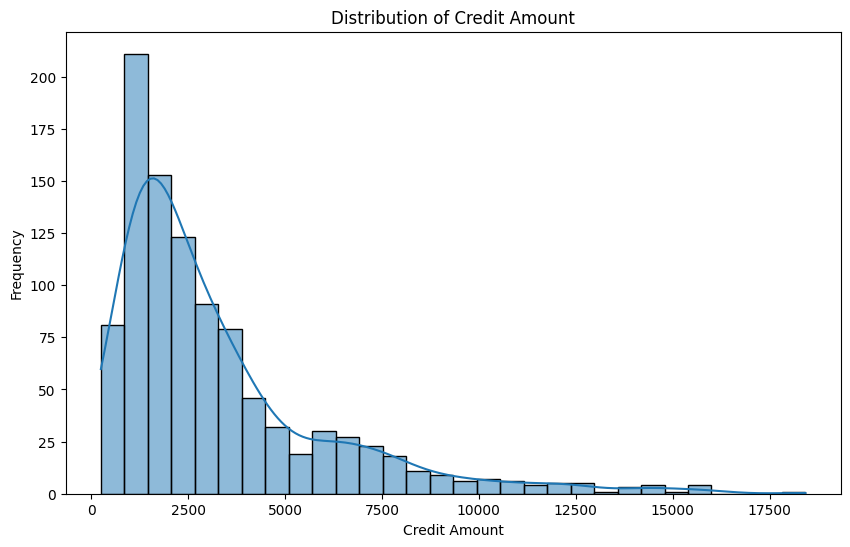

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['credit_amount'], bins=30, kde=True)
plt.title('Distribution of Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data_jml_kredit = df.groupby('class')['credit_amount'].mean()
data_jml_kredit

,credit_amount
class,
bad,3938.13
good,2985.46


In [ ]:
data_jml_kredit = df.groupby('class')['credit_amount'].median()
data_jml_kredit

,credit_amount
class,
bad,2574.50
good,2244.00


In [ ]:
data_jml_kredit = df.groupby('class')['credit_amount'].describe()
data_jml_kredit

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
bad,300.00,3938.13,3535.82,433.00,1352.50,2574.50,5141.50,18424.00
good,700.00,2985.46,2401.47,250.00,1375.50,2244.00,3634.75,15857.00


Korelasi

In [ ]:
import scipy.stats as stats

df['class_numeric'] = df['class'].apply(lambda x: 1 if x == 'good' else 0)

# Menghitung korelasi point-biserial
correlation, p_value = stats.pointbiserialr(df['class_numeric'], df['credit_amount'])
print(f"Korelasi Point-Biserial: {correlation}")
print(f"P-Value: {p_value}")

Korelasi Point-Biserial: -0.15473864110152383
P-Value: 8.7975723735284e-07


In [ ]:
df['class_numeric'].unique()

array([1, 0])

### Jawab
ternyata setelah diamati besar atau kecilnya credit amount tidak begitu mempengaruhi bahwa nasabah termasuk kedalam resiko kredit yang 'good' atupun 'bad'. dengan melihat deskripsi data mulai dari mean hingga median yang signifikan mempengaruhi class (good, bad)

# Bagaimana hubungan antara riwayat kredit (credit history) dan status risiko kredit (class)?

In [ ]:
df['credit_history'].unique()

array(['critical/other existing credit', 'existing paid',
       'delayed previously', 'no credits/all paid', 'all paid'],
      dtype=object)

In [ ]:
df['credit_history'].nunique()

5

In [ ]:
data_kredit_history = df.groupby('class')['credit_history'].value_counts()
data_kredit_history

class  credit_history                
bad    existing paid                     169
       critical/other existing credit     50
       all paid                           28
       delayed previously                 28
       no credits/all paid                25
good   existing paid                     361
       critical/other existing credit    243
       delayed previously                 60
       all paid                           21
       no credits/all paid                15
Name: count, dtype: int64

In [ ]:
crosstab = pd.crosstab(df['credit_history'], df['class'])
print(crosstab)

class                           bad  good
credit_history                           
all paid                         28    21
critical/other existing credit   50   243
delayed previously               28    60
existing paid                   169   361
no credits/all paid              25    15


In [ ]:
from scipy.stats import chi2_contingency

# Uji Chi-Square pada tabel kontingensi
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

Chi-Square: 61.691396964595505
P-Value: 1.2791872956750962e-12


In [ ]:
proportion = crosstab.div(crosstab.sum(axis=1), axis=0)
print(proportion)

class                           bad  good
credit_history                           
all paid                       0.57  0.43
critical/other existing credit 0.17  0.83
delayed previously             0.32  0.68
existing paid                  0.32  0.68
no credits/all paid            0.62  0.38


## Jawab
Berdasarkan hasil analisis chi-square di atas, kita dapat menyimpulkan bahwa ada hubungan yang sangat signifikan antara "class" dan "credit history". Ini berarti bahwa "credit history" seseorang sangat berpengaruh terhadap "class" yang diberikan.

Kita juga dapat melihat dari table proportion diatas, credit_history mana yang memiliki presentase good paling tinggi dan yang paling rendah

# Apakah durasi pinjaman (duration) antara peminjam mempengaruhi class ("good" dan "bad")?

In [ ]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,class_numeric
0,<0,6.00,critical/other existing credit,radio/tv,1169.00,no known savings,>=7,4.00,male single,none,...,67.00,none,own,2.00,skilled,1.00,yes,yes,good,1
1,0<=X<200,48.00,existing paid,radio/tv,5951.00,<100,1<=X<4,2.00,female div/dep/mar,none,...,22.00,none,own,1.00,skilled,1.00,none,yes,bad,0
2,no checking,12.00,critical/other existing credit,education,2096.00,<100,4<=X<7,2.00,male single,none,...,49.00,none,own,1.00,unskilled resident,2.00,none,yes,good,1
3,<0,42.00,existing paid,furniture/equipment,7882.00,<100,4<=X<7,2.00,male single,guarantor,...,45.00,none,for free,1.00,skilled,2.00,none,yes,good,1
4,<0,24.00,delayed previously,new car,4870.00,<100,1<=X<4,3.00,male single,none,...,53.00,none,for free,2.00,skilled,2.00,none,yes,bad,0


In [ ]:
data_duration = df.groupby('class')['duration'].describe()
data_duration

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
bad,300.00,24.86,13.28,6.00,12.00,24.00,36.00,72.00
good,700.00,19.21,11.08,4.00,12.00,18.00,24.00,60.00


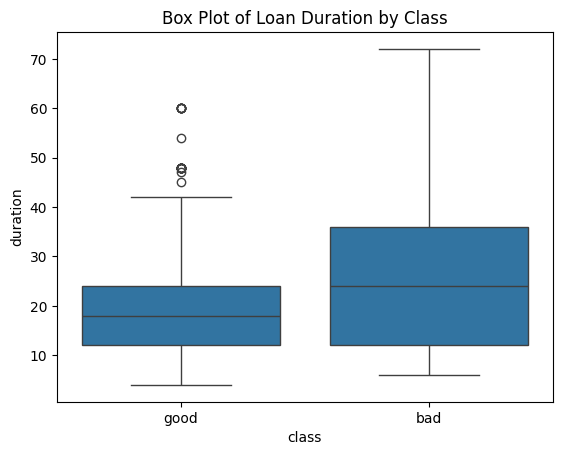

In [ ]:
sns.boxplot(x='class', y='duration', data=df)
plt.title("Box Plot of Loan Duration by Class")
plt.show()

## Jawab

dari analisis diatas peminjam yang termasuk dalam kategori "bad" cenderung memiliki durasi pinjaman yang lebih lama dibandingkan dengan peminjam yang termasuk dalam kategori "good".

# Data Preprocessing

In [ ]:
data_preprocessed = df.copy()

In [ ]:
data_preprocessed.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,class_numeric
0,<0,6.00,critical/other existing credit,radio/tv,1169.00,no known savings,>=7,4.00,male single,none,...,67.00,none,own,2.00,skilled,1.00,yes,yes,good,1
1,0<=X<200,48.00,existing paid,radio/tv,5951.00,<100,1<=X<4,2.00,female div/dep/mar,none,...,22.00,none,own,1.00,skilled,1.00,none,yes,bad,0
2,no checking,12.00,critical/other existing credit,education,2096.00,<100,4<=X<7,2.00,male single,none,...,49.00,none,own,1.00,unskilled resident,2.00,none,yes,good,1
3,<0,42.00,existing paid,furniture/equipment,7882.00,<100,4<=X<7,2.00,male single,guarantor,...,45.00,none,for free,1.00,skilled,2.00,none,yes,good,1
4,<0,24.00,delayed previously,new car,4870.00,<100,1<=X<4,3.00,male single,none,...,53.00,none,for free,2.00,skilled,2.00,none,yes,bad,0


In [ ]:
data_preprocessed.isna().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [ ]:
data_preprocessed.duplicated().sum()

0

In [ ]:
data_preprocessed.nunique()

,0
checking_status,4
duration,33
credit_history,5
purpose,10
credit_amount,921
savings_status,5
employment,5
installment_commitment,4
personal_status,4
other_parties,3


In [ ]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

## Seleksi Feature yang Tidak Penting

feature own_telephone, foreign_worker , residence_since tidak terlalu berpengaruh terhadap status

In [ ]:
data_preprocessed = data_preprocessed.drop(['own_telephone', 'foreign_worker', 'residence_since','class'], axis=1)
data_preprocessed.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,class_numeric
0,<0,6.00,critical/other existing credit,radio/tv,1169.00,no known savings,>=7,4.00,male single,none,real estate,67.00,none,own,2.00,skilled,1.00,1
1,0<=X<200,48.00,existing paid,radio/tv,5951.00,<100,1<=X<4,2.00,female div/dep/mar,none,real estate,22.00,none,own,1.00,skilled,1.00,0
2,no checking,12.00,critical/other existing credit,education,2096.00,<100,4<=X<7,2.00,male single,none,real estate,49.00,none,own,1.00,unskilled resident,2.00,1
3,<0,42.00,existing paid,furniture/equipment,7882.00,<100,4<=X<7,2.00,male single,guarantor,life insurance,45.00,none,for free,1.00,skilled,2.00,1
4,<0,24.00,delayed previously,new car,4870.00,<100,1<=X<4,3.00,male single,none,no known property,53.00,none,for free,2.00,skilled,2.00,0


In [ ]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  property_magnitude      1000 non-null   object 
 11  age                     1000 non-null   float64
 12  other_payment_plans     1000 non-null   object 
 13  housing                 1000 non-null   object 
 14  existing_credits        1000 non-null   f

## Mengubah Kategorical data ke numeric

In [ ]:
# split nominal and ordinal cat features
nominals = ['purpose','credit_history', 'personal_status', 'personal_status', 'other_parties','property_magnitude', 'other_payment_plans','housing','job']
ordinals = ['checking_status', 'savings_status','employment']

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(data, nominals):
    # Hilangkan duplikasi kolom dengan menggunakan set
    nominals = list(set(nominals))

    for column in nominals:
        le = LabelEncoder()  # Buat LabelEncoder baru untuk setiap kolom
        data[column] = le.fit_transform(data[column].astype(str))  # Ubah ke string jika perlu

    return data

# Menggunakan fungsi label_encoder
nominals = ['credit_history', 'purpose', 'personal_status', 'personal_status', 'other_parties',
            'property_magnitude', 'other_payment_plans', 'housing', 'job']

# Panggil fungsi dengan menghilangkan duplikasi dan mengencode semua kolom
data_preprocessed = label_encoder(data_preprocessed, nominals)
data_preprocessed.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,class_numeric
0,<0,6.00,1,6,1169.00,no known savings,>=7,4.00,3,2,3,67.00,1,1,2.00,1,1.00,1
1,0<=X<200,48.00,3,6,5951.00,<100,1<=X<4,2.00,0,2,3,22.00,1,1,1.00,1,1.00,0
2,no checking,12.00,1,2,2096.00,<100,4<=X<7,2.00,3,2,3,49.00,1,1,1.00,3,2.00,1
3,<0,42.00,3,3,7882.00,<100,4<=X<7,2.00,3,1,1,45.00,1,0,1.00,1,2.00,1
4,<0,24.00,2,4,4870.00,<100,1<=X<4,3.00,3,2,2,53.00,1,0,2.00,1,2.00,0


In [ ]:
data_preprocessed['checking_status'].unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

In [ ]:
data_preprocessed['savings_status'].unique()

array(['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500'],
      dtype=object)

In [ ]:
data_preprocessed['employment'].unique()

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

In [ ]:
def ordinal_encoding(data):
    # Urutan untuk checking_status
    checking_status_order = ['<0', '0<=X<200', '>=200', 'no checking']
    data['checking_status'] = data['checking_status'].apply(lambda x: checking_status_order.index(x))

    # Urutan untuk savings_status
    savings_status_order = ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000']
    data['savings_status'] = data['savings_status'].apply(lambda x: savings_status_order.index(x))

    # Urutan untuk employment
    employment_order = ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7']
    data['employment'] = data['employment'].apply(lambda x: employment_order.index(x))

    return data

# Panggil fungsi untuk melakukan ordinal encoding
data_preprocessed = ordinal_encoding(data_preprocessed)

# Tampilkan data yang sudah di-encode
data_preprocessed.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,class_numeric
0,0,6.00,1,6,1169.00,0,4,4.00,3,2,3,67.00,1,1,2.00,1,1.00,1
1,1,48.00,3,6,5951.00,1,2,2.00,0,2,3,22.00,1,1,1.00,1,1.00,0
2,3,12.00,1,2,2096.00,1,3,2.00,3,2,3,49.00,1,1,1.00,3,2.00,1
3,0,42.00,3,3,7882.00,1,3,2.00,3,1,1,45.00,1,0,1.00,1,2.00,1
4,0,24.00,2,4,4870.00,1,2,3.00,3,2,2,53.00,1,0,2.00,1,2.00,0


In [ ]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int64  
 3   purpose                 1000 non-null   int64  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int64  
 6   employment              1000 non-null   int64  
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   int64  
 9   other_parties           1000 non-null   int64  
 10  property_magnitude      1000 non-null   int64  
 11  age                     1000 non-null   float64
 12  other_payment_plans     1000 non-null   int64  
 13  housing                 1000 non-null   int64  
 14  existing_credits        1000 non-null   f

In [ ]:
data_preprocessed.describe()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,class_numeric
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1.58,20.90,2.22,4.48,3271.26,1.19,2.38,2.97,1.88,1.87,1.39,35.55,0.91,1.07,1.41,1.27,1.16,0.70
std,1.26,12.06,1.06,2.42,2822.74,0.97,1.21,1.12,1.35,0.45,1.21,11.38,0.42,0.53,0.58,0.95,0.36,0.46
min,0.00,4.00,0.00,0.00,250.00,0.00,0.00,1.00,0.00,0.00,0.00,19.00,0.00,0.00,1.00,0.00,1.00,0.00
25%,0.00,12.00,1.00,3.00,1365.50,1.00,2.00,2.00,0.00,2.00,0.00,27.00,1.00,1.00,1.00,1.00,1.00,0.00
50%,1.00,18.00,3.00,4.00,2319.50,1.00,2.00,3.00,3.00,2.00,1.00,33.00,1.00,1.00,1.00,1.00,1.00,1.00
75%,3.00,24.00,3.00,6.00,3972.25,1.00,4.00,4.00,3.00,2.00,3.00,42.00,1.00,1.00,2.00,1.00,1.00,1.00
max,3.00,72.00,4.00,9.00,18424.00,4.00,4.00,4.00,3.00,2.00,3.00,75.00,2.00,2.00,4.00,3.00,2.00,1.00


## Penanganan Outlier

In [ ]:
threshold = 3
z_scores = np.abs((data_preprocessed - data_preprocessed.mean()) / data_preprocessed.std())
outliers = z_scores > threshold
outliers.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,class_numeric
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_preprocessed = data_preprocessed[(z_scores <= threshold)]
data_preprocessed.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,class_numeric
0,0,6.00,1,6,1169.00,0,4,4.00,3,2.00,3,67.00,1,1,2.00,1,1.00,1
1,1,48.00,3,6,5951.00,1,2,2.00,0,2.00,3,22.00,1,1,1.00,1,1.00,0
2,3,12.00,1,2,2096.00,1,3,2.00,3,2.00,3,49.00,1,1,1.00,3,2.00,1
3,0,42.00,3,3,7882.00,1,3,2.00,3,1.00,1,45.00,1,0,1.00,1,2.00,1
4,0,24.00,2,4,4870.00,1,2,3.00,3,2.00,2,53.00,1,0,2.00,1,2.00,0


In [ ]:
data_preprocessed['duration'].describe()

,duration
count,986.00
mean,20.34
std,11.15
min,4.00
25%,12.00
50%,18.00
75%,24.00
max,54.00


In [ ]:
data_preprocessed['credit_amount'].describe()

,credit_amount
count,975.00
mean,3001.95
std,2279.88
min,250.00
25%,1353.50
50%,2255.00
75%,3839.50
max,11590.00


In [ ]:

Q1 = data_preprocessed['credit_amount'].quantile(0.25)
Q3 = data_preprocessed['credit_amount'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Langkah 3: Hapus outlier
data_preprocessed = data_preprocessed[(data_preprocessed['credit_amount'] >= lower_bound) & (data_preprocessed['credit_amount'] <= upper_bound)]


In [ ]:
data_preprocessed.describe()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,class_numeric
count,915.00,908.00,915.00,915.00,915.00,915.00,915.00,915.00,915.00,880.00,915.00,908.00,915.00,915.00,910.00,915.00,915.00,915.00
mean,1.59,19.02,2.21,4.44,2604.28,1.21,2.38,3.03,1.86,1.94,1.42,35.21,0.91,1.09,1.39,1.32,1.16,0.72
std,1.26,10.15,1.06,2.34,1696.09,0.97,1.20,1.10,1.35,0.23,1.22,10.97,0.42,0.52,0.54,0.94,0.36,0.45
min,0.00,4.00,0.00,0.00,250.00,0.00,0.00,1.00,0.00,1.00,0.00,19.00,0.00,0.00,1.00,0.00,1.00,0.00
25%,0.00,12.00,1.00,3.00,1317.00,1.00,2.00,2.00,0.00,2.00,0.00,27.00,1.00,1.00,1.00,1.00,1.00,0.00
50%,1.00,18.00,3.00,4.00,2132.00,1.00,2.00,3.00,3.00,2.00,1.00,33.00,1.00,1.00,1.00,1.00,1.00,1.00
75%,3.00,24.00,3.00,6.00,3504.00,1.00,4.00,4.00,3.00,2.00,3.00,41.00,1.00,1.00,2.00,1.00,1.00,1.00
max,3.00,48.00,4.00,9.00,7511.00,4.00,4.00,4.00,3.00,2.00,3.00,68.00,2.00,2.00,3.00,3.00,2.00,1.00


## Memilih feature menggunakan korelasi

In [ ]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         915 non-null    int64  
 1   duration                908 non-null    float64
 2   credit_history          915 non-null    int64  
 3   purpose                 915 non-null    int64  
 4   credit_amount           915 non-null    float64
 5   savings_status          915 non-null    int64  
 6   employment              915 non-null    int64  
 7   installment_commitment  915 non-null    float64
 8   personal_status         915 non-null    int64  
 9   other_parties           880 non-null    float64
 10  property_magnitude      915 non-null    int64  
 11  age                     908 non-null    float64
 12  other_payment_plans     915 non-null    int64  
 13  housing                 915 non-null    int64  
 14  existing_credits        910 non-null    float64

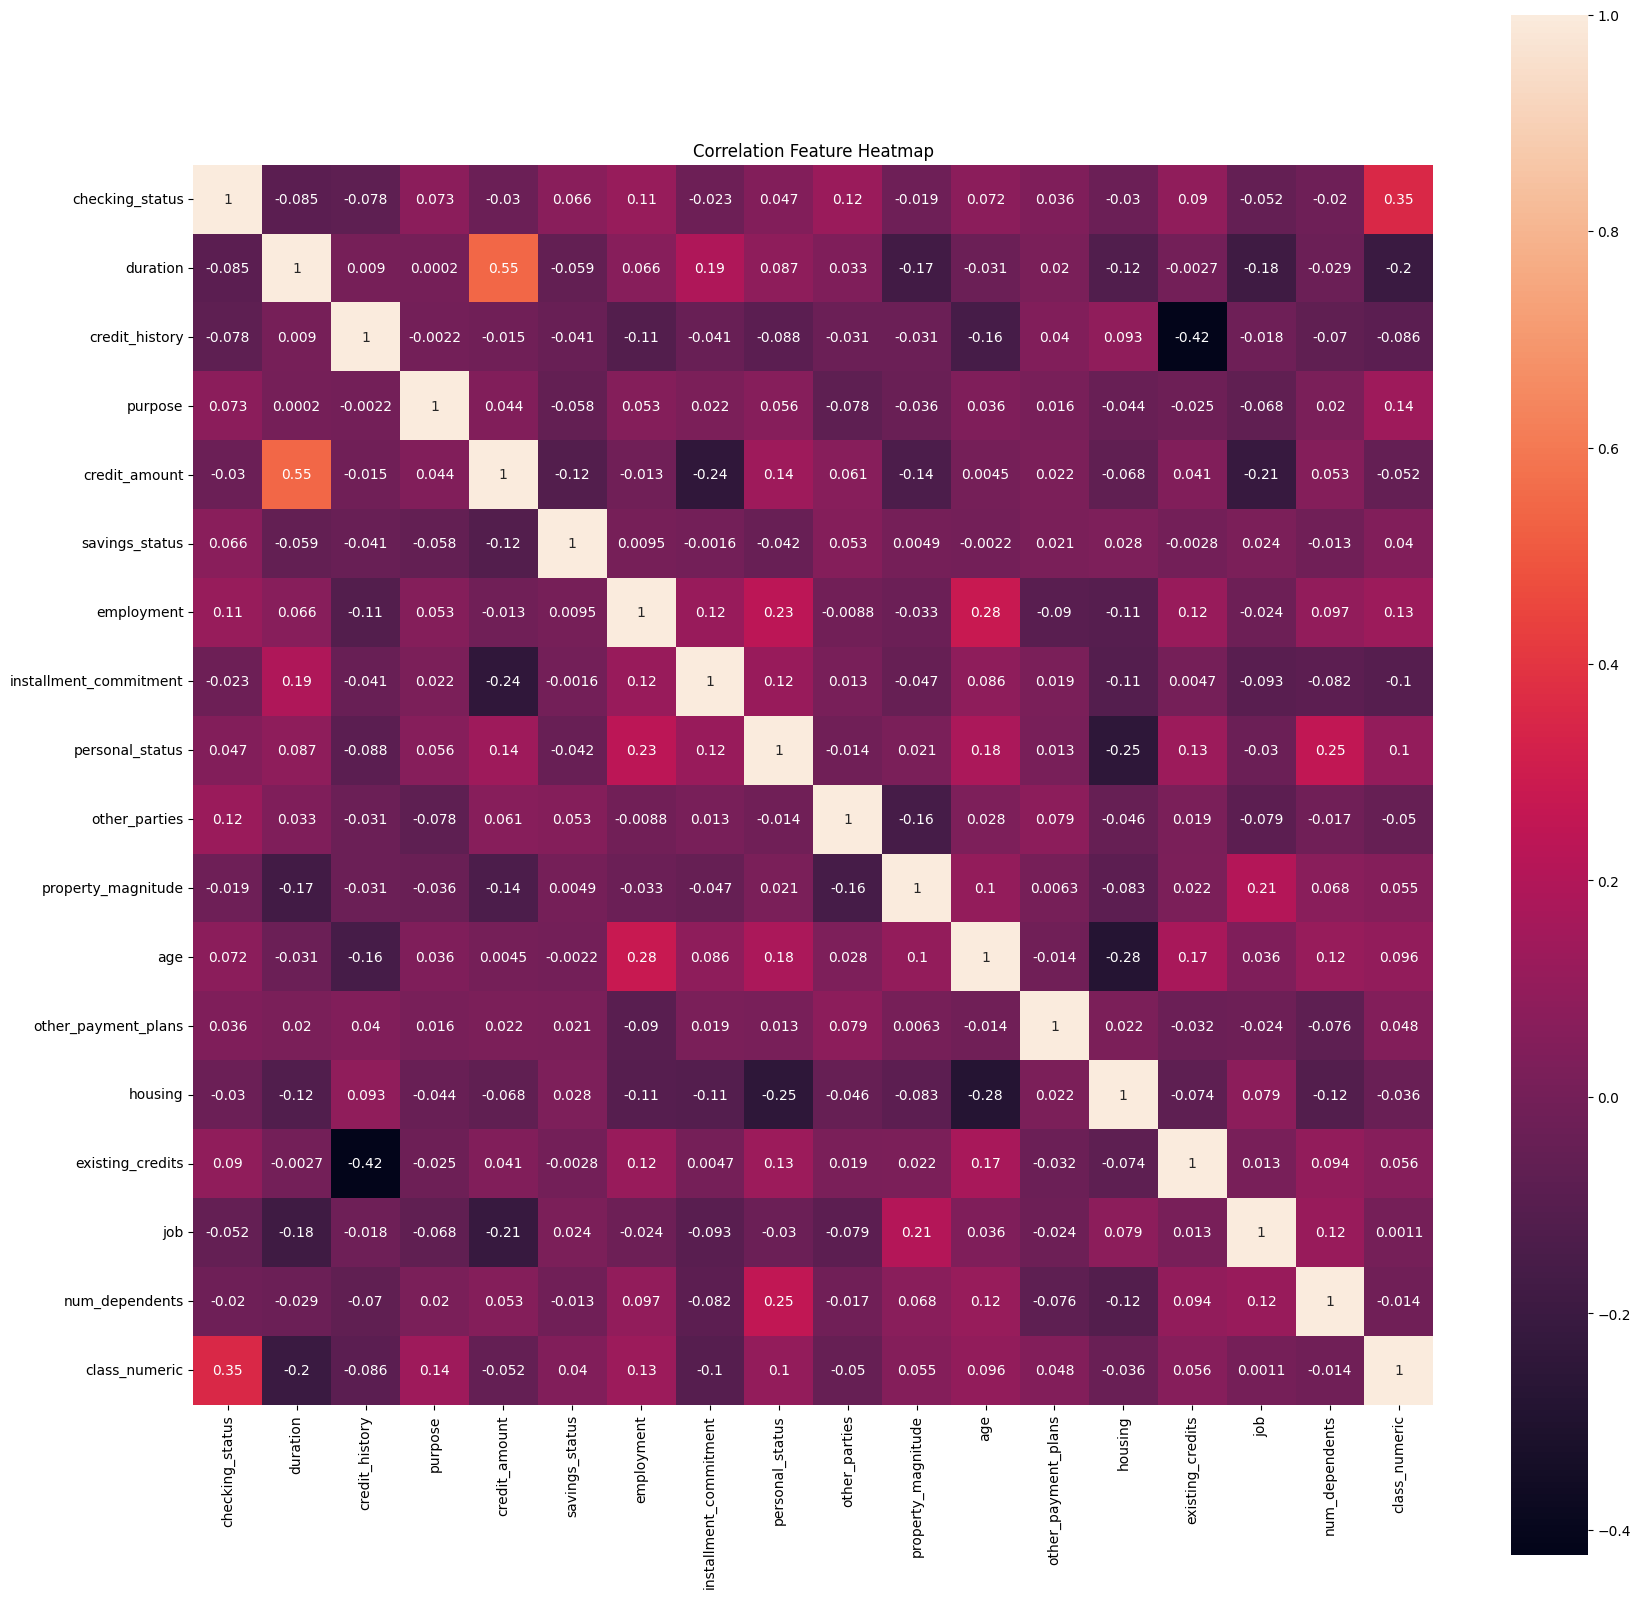

In [ ]:
corrmat = data_preprocessed.corr(method='pearson')
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, vmax=1, square=True);
plt.title('Correlation Feature Heatmap');
plt.show()

## Memilih feature menggunakan Embedded Method

In [ ]:
data_preprocessed.isna().sum()

,0
checking_status,0
duration,7
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,35


In [ ]:
data_preprocessed.duplicated().sum()

0

In [ ]:
data_preprocessed.dropna(inplace=True)

In [ ]:
X_train = data_preprocessed.drop(['class_numeric'], axis=1)
y_train = data_preprocessed['class_numeric']

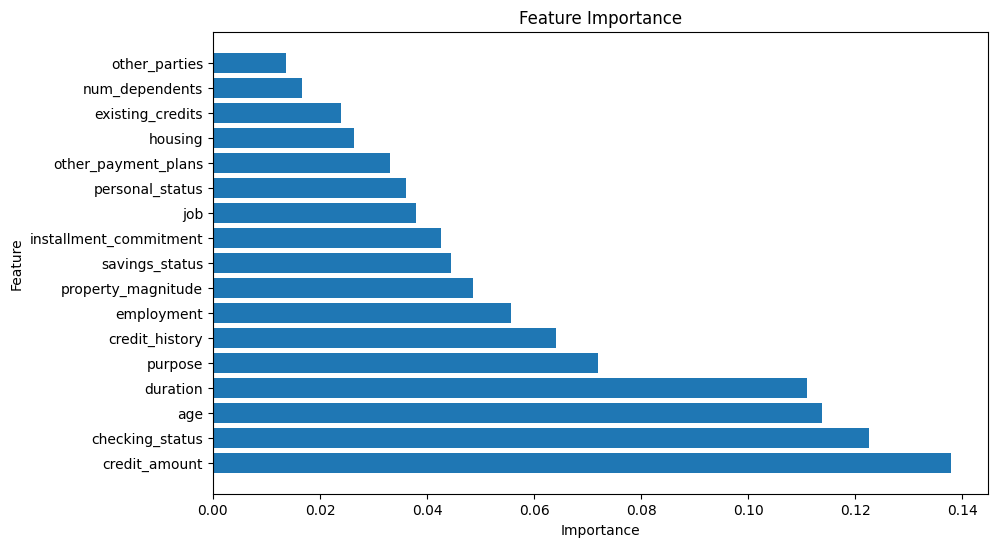

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6) ,)
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## Imbalanced Data Using Oversampling

In [ ]:
y_train.value_counts()

,count
class_numeric,
1,625
0,237


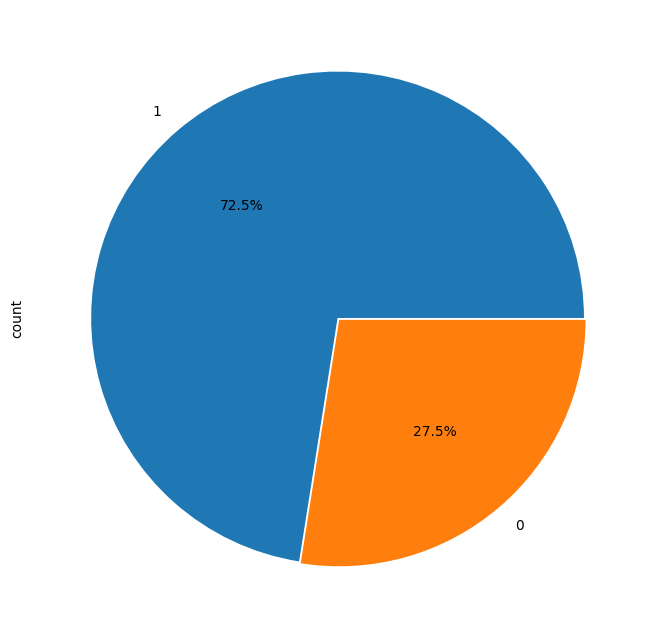

In [ ]:
f,ax=plt.subplots(1,1,figsize=(12,8))
y_train.value_counts().plot.pie(explode=[0,0.01],autopct='%1.1f%%',shadow=False)
plt.show()

Seimbangkan dulu biar tidak imbalance

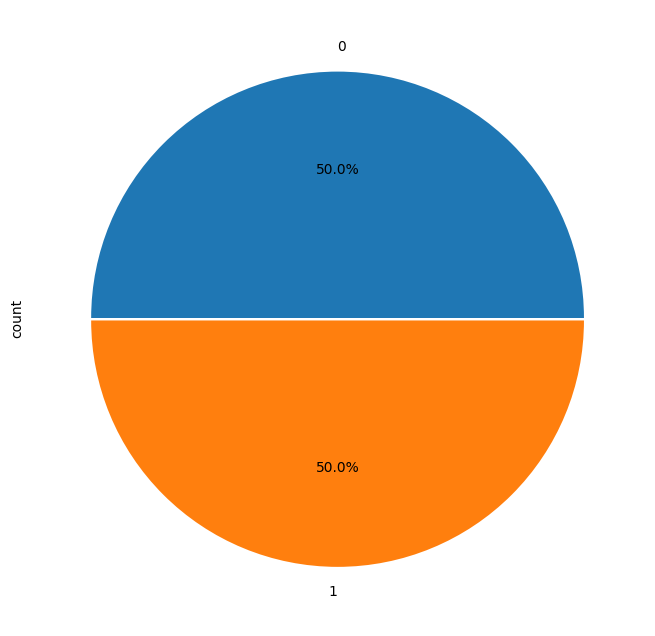

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)
y_train.value_counts()
f,ax=plt.subplots(1,1,figsize=(12,8))
y_train.value_counts().plot.pie(explode=[0,0.01],autopct='%1.1f%%',shadow=False)
plt.show()

# Modeling

## Split data jadi train dan test

In [ ]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         862 non-null    int64  
 1   duration                862 non-null    float64
 2   credit_history          862 non-null    int64  
 3   purpose                 862 non-null    int64  
 4   credit_amount           862 non-null    float64
 5   savings_status          862 non-null    int64  
 6   employment              862 non-null    int64  
 7   installment_commitment  862 non-null    float64
 8   personal_status         862 non-null    int64  
 9   other_parties           862 non-null    float64
 10  property_magnitude      862 non-null    int64  
 11  age                     862 non-null    float64
 12  other_payment_plans     862 non-null    int64  
 13  housing                 862 non-null    int64  
 14  existing_credits        862 non-null    float64

In [ ]:
X = X_train
y = y_train

In [ ]:
from sklearn.model_selection import train_test_split

# Train & Test Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1194 to 1126
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int64  
 3   purpose                 1000 non-null   int64  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int64  
 6   employment              1000 non-null   int64  
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   int64  
 9   other_parties           1000 non-null   float64
 10  property_magnitude      1000 non-null   int64  
 11  age                     1000 non-null   float64
 12  other_payment_plans     1000 non-null   int64  
 13  housing                 1000 non-null   int64  
 14  existing_credits        1000 non-null   fl

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1000 entries, 1194 to 1126
Series name: class_numeric
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


In [ ]:
class_score = pd.DataFrame(columns=["Model", "Accuracy"])

pd.options.display.float_format = '{:.2f}'.format

# Karena nilai akurasi yang mendekati 1 itu semakin baik, maka kita beri parameter ascending=False
class_score.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {score}")
class_score.loc[len(class_score)] = ["KNN", score]

class_score

Accuracy Score: 0.624


,Model,Accuracy
0,KNN,0.62


## GradientBoost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_gb = model_gb.predict(X_test)

# Evaluasi performa model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Tampilkan hasil evaluasi
print(f'Gradient Boosting Classifier:\nAccuracy: {accuracy_gb:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix_gb)
print('\nClassification Report:')
print(class_report_gb)




Gradient Boosting Classifier:
Accuracy: 0.81

Confusion Matrix:
[[ 97  22]
 [ 26 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       119
           1       0.83      0.80      0.81       131

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



### HyperTuning Parameter

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # Definisikan parameter grid yang lebih efisien
# param_grid = {
#     'n_estimators': [50, 100, 150],  # Lebih sedikit estimators
#     'learning_rate': [0.01, 0.1],  # Fokus pada beberapa nilai learning rate
#     'max_depth': [3, 4],  # Batasi kedalaman pohon untuk menghindari overfitting pada dataset kecil
#     'min_samples_split': [2, 5],  # Kurangi opsi untuk split
#     'min_samples_leaf': [1, 2]  # Batasi jumlah daun minimum
# }

# # Inisiasi GridSearchCV dengan parameter yang lebih efisien
# grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
#                            param_grid=param_grid,
#                            cv=5,
#                            scoring='accuracy',
#                            n_jobs=-1)

# # Fit grid search pada data train
# grid_search.fit(X_train, y_train)

# # Model terbaik
# best_model_gb = grid_search.best_estimator_

# # Lakukan prediksi pada data uji dengan model terbaik
# y_pred_gb = best_model_gb.predict(X_test)

# # Evaluasi performa model
# accuracy_gb = accuracy_score(y_test, y_pred_gb)
# conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
# class_report_gb = classification_report(y_test, y_pred_gb)

# # Tampilkan hasil evaluasi
# print(f'Gradient Boosting Classifier (Best Model):\nAccuracy: {accuracy_gb:.2f}\n')
# print('Confusion Matrix:')
# print(conf_matrix_gb)
# print('\nClassification Report:')
# print(class_report_gb)
# class_score.loc[len(class_score)] = ["GradientBoost", accuracy_gb]

# class_score

## XGBost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inisiasi model XGBoost
model_xgb = XGBClassifier(random_state=42, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_xgb = model_xgb.predict(X_test)

# Evaluasi performa model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Tampilkan hasil evaluasi
print(f'XGBoost Classifier:\nAccuracy: {accuracy_xgb:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix_xgb)
print('\nClassification Report:')
print(class_report_xgb)

class_score.loc[len(class_score)] = ["XGBoost", accuracy_xgb]

class_score

XGBoost Classifier:
Accuracy: 0.88

Confusion Matrix:
[[106  13]
 [ 18 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       119
           1       0.90      0.86      0.88       131

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



,Model,Accuracy
0,KNN,0.62
1,XGBoost,0.88


## HyperTuning Parameter

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_child_weight': [1, 2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42, eval_metric='logloss'),
#                            param_grid=param_grid,
#                            scoring='accuracy',
#                            cv=5,
#                            n_jobs=-1,
#                            verbose=1)

# grid_search.fit(X_train, y_train)

# # Dapatkan model terbaik dan lakukan evaluasi ulang
# best_model_xgb = grid_search.best_estimator_
# y_pred_xgb = best_model_xgb.predict(X_test)

# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# print(f'Best XGBoost Model Accuracy: {accuracy_xgb:.2f}')


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_rf = model_rf.predict(X_test)

# Evaluasi performa model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Tampilkan hasil evaluasi
print(f'Random Forest Classifier:\nAccuracy: {accuracy_rf:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('\nClassification Report:')
print(class_report_rf)

class_score.loc[len(class_score)] = ["Random Forest", accuracy_rf]

class_score

Random Forest Classifier:
Accuracy: 0.88

Confusion Matrix:
[[105  14]
 [ 17 114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       119
           1       0.89      0.87      0.88       131

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



,Model,Accuracy
0,KNN,0.62
1,XGBoost,0.88
2,Random Forest,0.88


##  Naive Bayes (Classification task)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {score}")

class_score.loc[len(class_score)] = ["Naive Bayes", score]

class_score

Accuracy Score: 0.72


,Model,Accuracy
0,KNN,0.62
1,XGBoost,0.88
2,Random Forest,0.88
3,Naive Bayes,0.72
